In [1]:
#importing the necessary libs and packages
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#preparing the data to our needs before importing
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [3]:
data = []
conversation = 'WhatsApp Chat with F•R•I•E•N•D•S🤍.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date      Time  Author  \
1070 2022-10-06  10:39 am    Aadi   
1071 2022-10-06  10:39 am   Mukul   
1072 2022-10-06  10:39 am   Mukul   
1073 2022-10-06  10:39 am    Aadi   
1074 2022-10-06  10:39 am     Raj   
1075 2022-10-06  10:40 am   Mukul   
1076 2022-10-06  10:40 am   Mukul   
1077 2022-10-06  10:40 am    Aadi   
1078 2022-11-06   1:18 am   Harsh   
1079 2022-11-06   1:18 am   Harsh   
1080 2022-11-06   1:18 am    Aadi   
1081 2022-11-06   1:19 am   Akash   
1082 2022-11-06   2:14 am   Mukul   
1083 2022-11-06   9:00 am  Nikhil   
1084 2022-11-06   9:12 am    Amit   
1085 2022-06-23   9:49 pm   Akash   
1086 2022-06-23  10:04 pm   Harsh   
1087 2022-06-23  10:29 pm  Roshan   
1088 2022-06-23  11:05 pm   Akash   
1089 2022-06-23  11:07 pm    None   

                                                Message  
1070                                            Kaha ho  
1071                                    Abhi to room pe  
1072                                       2 baj

In [5]:
total_messages = df.shape[0]
print(total_messages)

1090


In [6]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

130


In [7]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

459


In [8]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between friends")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between friends
Total Messages:  1090
Number of Media Shared:  130
Number of Emojis Shared 459
Number of Links Shared 26


In [9]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Someshwar', 'Harneet', 'Nikhil', 'Roshan', 'Akash', 'Rahul', 'Tarun',
 'Raj', 'Mukul', 'Aadi', 'Yogesh', 'Harsh', 'Amit']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  print()  

Stats of Someshwar -
Messages Sent 110
Average Words per message 5.036363636363636
Media Messages Sent 16
Emojis Sent 89
Links Sent 0

Stats of Harneet -
Messages Sent 104
Average Words per message 5.913461538461538
Media Messages Sent 17
Emojis Sent 73
Links Sent 1

Stats of Nikhil -
Messages Sent 24
Average Words per message 3.625
Media Messages Sent 15
Emojis Sent 10
Links Sent 0

Stats of Roshan -
Messages Sent 7
Average Words per message 2.5714285714285716
Media Messages Sent 2
Emojis Sent 2
Links Sent 0

Stats of Akash -
Messages Sent 14
Average Words per message 2.0714285714285716
Media Messages Sent 1
Emojis Sent 18
Links Sent 0

Stats of Rahul -
Messages Sent 14
Average Words per message 4.0
Media Messages Sent 4
Emojis Sent 6
Links Sent 0

Stats of Tarun -
Messages Sent 7
Average Words per message 2.7142857142857144
Media Messages Sent 6
Emojis Sent 3
Links Sent 0

Stats of Raj -
Messages Sent 123
Average Words per message 12.739837398373984
Media Messages Sent 11
Emojis Sent

In [10]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 184)
('🌚', 50)
('🤣', 19)
('😌', 18)
('🤡', 16)
('💀', 14)
('🌝', 11)
('👁️', 10)
('🥳', 10)
('🤦🏻\u200d♂️', 9)
('😎', 7)
('🙂', 6)
('😝', 6)
('🏆', 6)
('🔥', 5)
('😘', 5)
('🥱', 4)
('👄', 4)
('💞', 4)
('✨', 4)
('❤️', 3)
('🥲', 3)
('👌', 3)
('👍', 3)
('📍', 3)
('🙃', 3)
('👍🏻', 3)
('👀', 2)
('🤷🏻\u200d♂️', 2)
('😏', 2)
('👏', 2)
('💪🏼', 2)
('💫', 2)
('🤩', 2)
('\U0001f979', 2)
('🤍', 1)
('🍺', 1)
('❣️', 1)
('😊', 1)
('💪', 1)
('👉', 1)
('😜', 1)
('🤷', 1)
('😶', 1)
('😡', 1)
('😤', 1)
('⌚', 1)
('😅', 1)
('🦚', 1)
('🎂', 1)
('😁', 1)
('👻', 1)
('🤦\u200d♀️', 1)
('😞', 1)
('🙏🏻', 1)
('🙏', 1)
('📅', 1)
('⏱️', 1)
('🔗', 1)
('✌🏻', 1)
('🤘', 1)
('💡', 1)
('🤌🏼', 1)
('🤭', 1)
('🎊', 1)


There are 35270 words in all the messages.


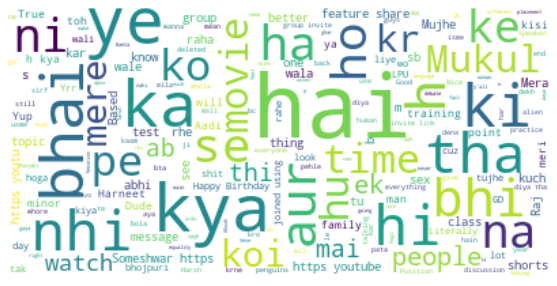

In [11]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Someshwar


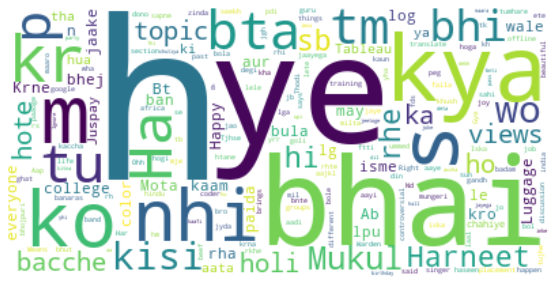

Author name Harneet


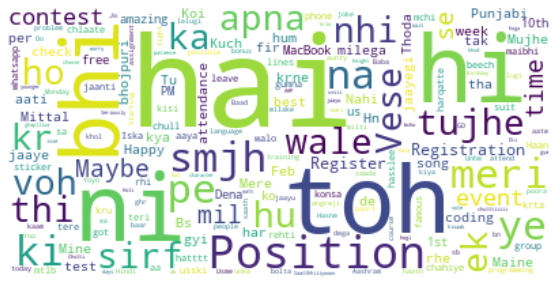

Author name Nikhil


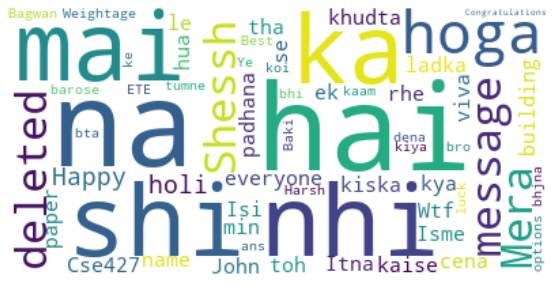

Author name Roshan


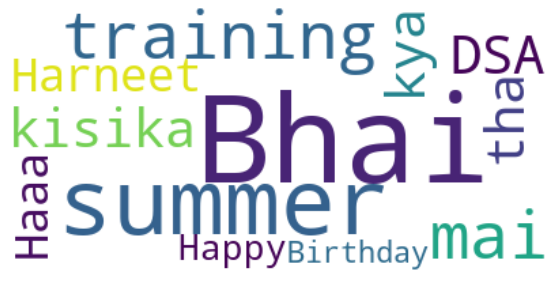

Author name Akash


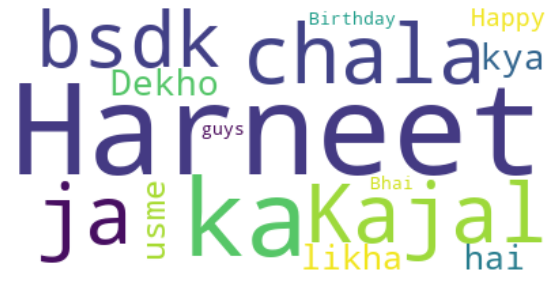

Author name Rahul


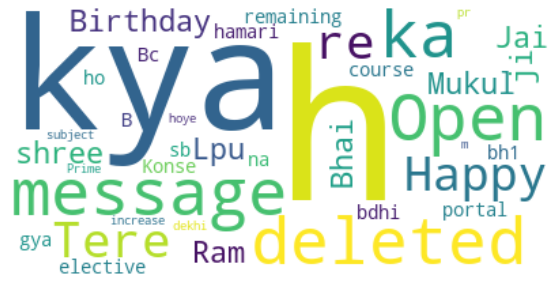

Author name Tarun


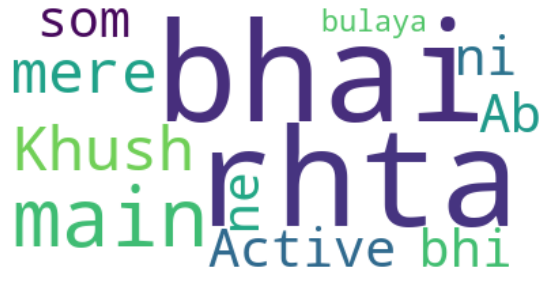

Author name Raj


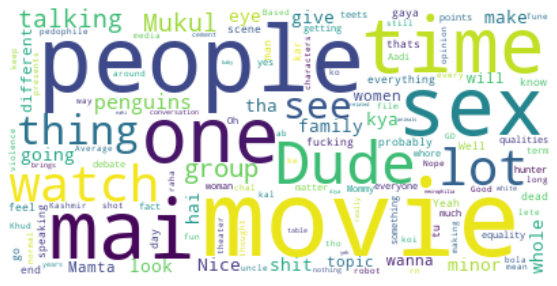

Author name Mukul


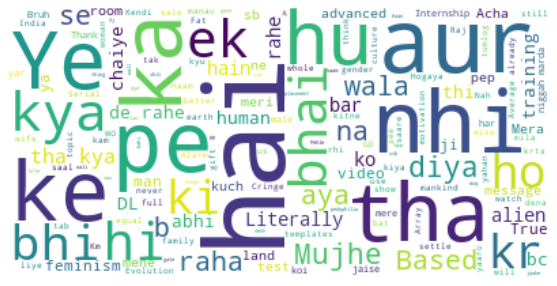

Author name Aadi


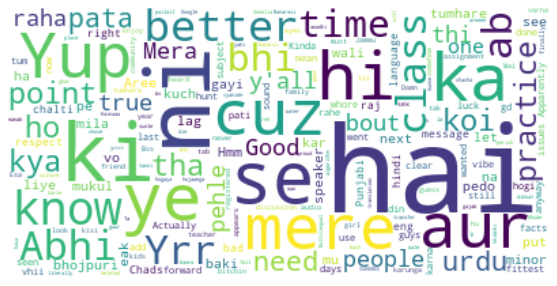

Author name Yogesh


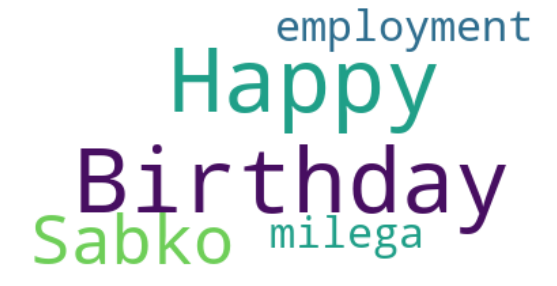

Author name Harsh


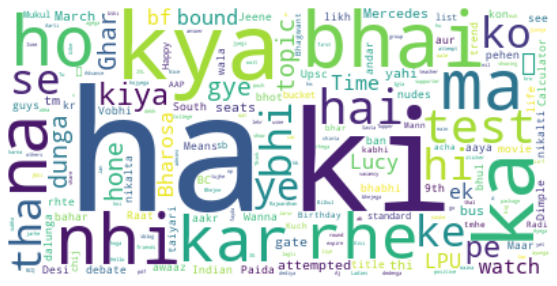

Author name Amit


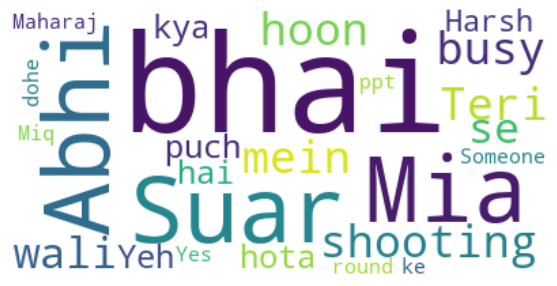

In [12]:
l = ['Someshwar', 'Harneet', 'Nikhil', 'Roshan', 'Akash', 'Rahul', 'Tarun',
 'Raj', 'Mukul', 'Aadi', 'Yogesh', 'Harsh', 'Amit']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()